In [1]:
#first get the python modules we need
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
import natsort


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

#fitting the emission lines
from astropy.modeling import models, fitting
from astropy import constants as const
from astropy import units as u
import pandas as pd
from astropy.convolution import convolve, Box1DKernel
from scipy.signal import find_peaks
from astropy.table import Table, Column, QTable
from astropy.io import fits
import matplotlib.cm as cm


#Lomb-Scargle Periodograms
from astropy.timeseries import LombScargle as LS

In [17]:
from astropy.time import Time
t

array([58601.08955681, 58601.09418082, 58601.15985358, 58601.17048668,
       58601.1785773 , 58602.06879533, 58602.07456747, 58602.08034043,
       58602.0861113 , 58602.09188148, 58602.09997072, 58602.10572851,
       58602.11150645, 58602.11727917, 58602.12305167, 58602.13689975,
       58602.14267074, 58602.20636724, 58168.26580564])

### Plotting LS to determine the period

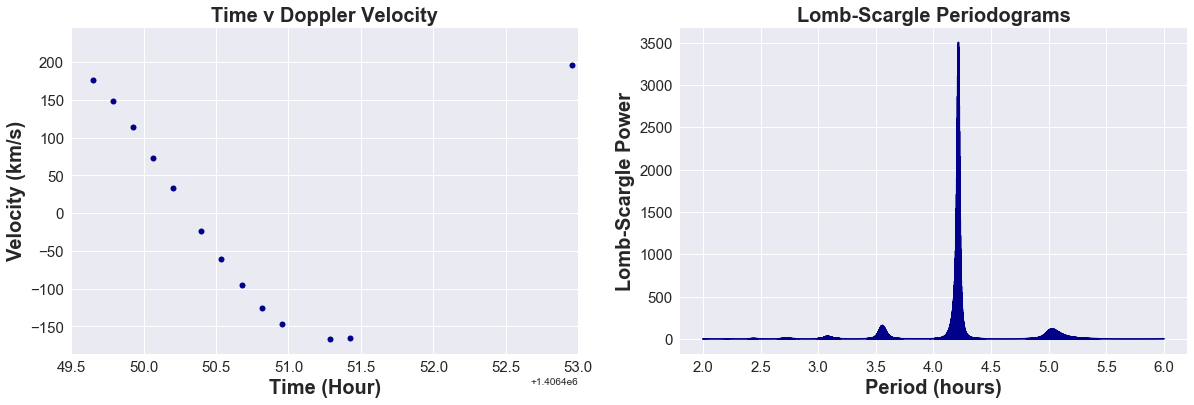

4.216490957939028

In [16]:
df1 = pd.read_csv("/Users/linaflorez/Desktop/UT_TAURUS/CSV_FILES/OriginalData.csv")
data1 = df1.loc[df1['Detections'] == 'Yes']
t1 = data1["MJD"].values
y1 = data1["Weighted Mean"].values
dy1 = data1["Weighted Error"].values

# df1_no = pd.read_csv("/Users/linaflorez/Desktop/UT_TAURUS/CSV_FILES/OriginalData.csv")
# data1_no= df1_no.loc[df1_no['Detections'] == 'No']
# t1_no = data1_no["MJD"].values
# y1_no = data1_no["Weighted Mean"].values
# dy1_no = data1_no["Weighted Error"].values
####################################################

df2 = pd.read_csv("/Users/linaflorez/Desktop/UT_TAURUS/CSV_FILES/NEW_OLD.csv")
data2 = df2.loc[df2['Detections'] == 'Yes']
t2 = data2["MJD"].values
y2 = data2["Weighted Mean"].values
dy2 = data2["Weighted Error"].values

# df2_no = pd.read_csv("/Users/linaflorez/Desktop/UT_TAURUS/CSV_FILES/NEW_OLD.csv")
# data2_no = df2_no.loc[df2_no['Detections'] == 'No']
# t2_no = data2_no["MJD"].values
# y2_no = data2_no["Weighted Mean"].values
# dy2_no = data2_no["Weighted Error"].values

t = np.append(t1, t2) #* u.d
y = np.append(y1, y2) #* (u.km/u.s)
dy = np.append(dy1, dy2) #* (u.km/u.s)

frequency, power = LS(t, y, dy, normalization= "model").autopower(minimum_frequency = 4, maximum_frequency = 12) #frequency units: 1/d

plt.style.use("seaborn")
f, (ax1, ax2) = plt.subplots(1,2,figsize=(20,6))
ax1.set_title("Time v Doppler Velocity", weight = "bold", size = 20)
ax1.plot((t * u.d).to(u.hour).value,y,".", color = "darkblue", markersize = 12)
ax1.set_xlabel("Time (Hour)", weight = "bold", size = 20)
ax1.set_ylabel("Velocity (km/s)", weight = "bold", size = 20)
ax1.set_xlim(1406449.5,1406453)
ax1.tick_params("both", labelsize = 15)

period = (1/frequency)#.to(u.hour)
ax2.set_title("Lomb-Scargle Periodograms", weight = "bold", size = 20)
ax2.plot(period *24, power, c = "darkblue", label = "Lomb Scargle")
ax2.set_xlabel("Period (hours)", weight = "bold", size = 20)
ax2.set_ylabel("Lomb-Scargle Power", weight = "bold", size = 20)
ax2.tick_params("both", labelsize = 15)
#ax2.set_xlim(2,6)
#plt.savefig("Plots/OriginalData/OriginalData_LSP.pdf")
plt.show()

1/(frequency[np.argmax(power)]) * 24

## For publication

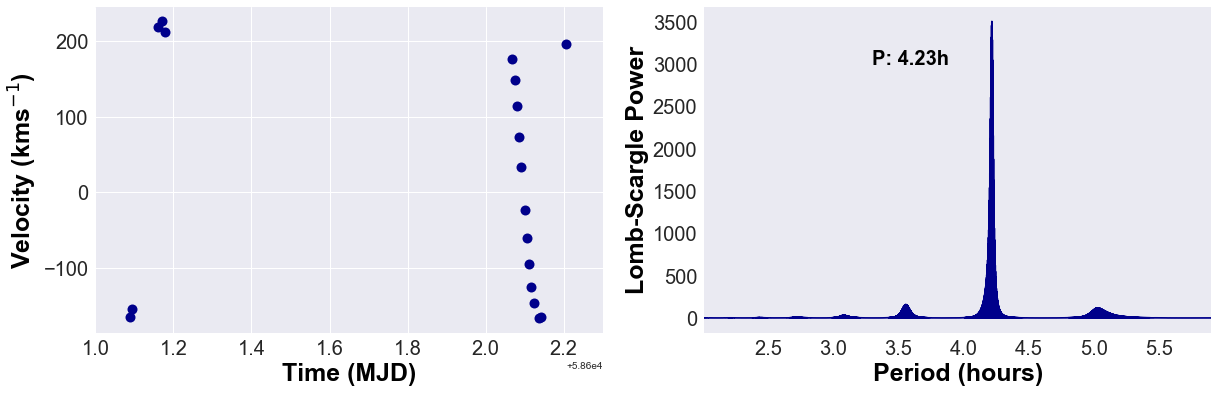

In [9]:
# FIRST SUBPLOT
period = (1/frequency)
period_value = (period[np.argmax(power)]*24)

plt.figure(figsize=(8, 6), frameon = True, edgecolor = "black")
plt.style.use("seaborn-ticks")
plt.gcf()

####################################################
####################################################
# SECOND SUBPLOT
df1 = pd.read_csv("/Users/linaflorez/Desktop/UT_TAURUS/CSV_FILES/OriginalData.csv")
d1 = df1.loc[df1['Detections'] == 'Yes']
t1 = d1["MJD"].values
y1 = d1["Weighted Mean"].values
dy1 = d1["Weighted Error"].values


df2 = pd.read_csv("/Users/linaflorez/Desktop/UT_TAURUS/CSV_FILES/NEW_OLD.csv")
d2 = df2.loc[df2['Detections'] == 'Yes']
t2 = d2["MJD"].values
y2 = d2["Weighted Mean"].values
dy2 = d2["Weighted Error"].values

####################################################
#detected
y_1 = t1#(t1/(1/(frequency[np.argmax(power)]))) %1
cp_y1 = [(x+1) for x in np.copy(y_1)]

y_2 = t2#/(1/(frequency[np.argmax(power)])) %1
cp_y2 = [(x+1) for x in np.copy(y_2)]

# x1s = np.append(y_1, cp_y1)
# x1s = np.concatenate([y_1, cp_y1, y_2, cp_y2], axis = 0)
x1s = np.concatenate([y_1, y_2], axis = 0)
# y1s = np.tile(y1,2)
# y2s = np.tile(y2,2)
# y1s = np.concatenate([y1s, y2s], axis = 0)
y1s = np.concatenate([y1, y2], axis = 0)

####################################################

# plt.plot(x1s,y1s, "k.", markersize = 20)
# plt.xlabel("Orbital Phase", weight = "bold", color = "black", size = 17)
# plt.ylabel("Velocity (kms$^{-1}$)", weight = "bold", color = "black",size = 17)
# plt.xlim(0.01,1)
# plt.grid(False)
# plt.tick_params("both", labelsize = 15)

# a = plt.axes([0.5, 0.48, .4, .4])# facecolor='white')
# plt.plot(period*24, power, color = "black", label = "Lomb Scargle")
# plt.text(3.3, 3000, "P: %.2fh" % (4.23),fontsize=10, color = "black", weight = 'bold')
# plt.xlabel("Period (hours)", weight = "bold", color = "black", size = 8)
# plt.ylabel("Lomb-Scargle Power", weight = "bold", color = "black", size = 8)
# plt.xlim(2.01,5.9)
# plt.grid(False)
# plt.tick_params("both", labelsize = 8)
# plt.savefig("/Users/linaflorez/Desktop/UT_TAURUS/Plots/CombinedPOSTER.pdf", transparent = False, dpi = 300, quality = 95)
# plt.show()
plt.style.use("seaborn")
f, (ax1, ax2) = plt.subplots(1,2,figsize=(20,6))
ax1.plot(x1s,y1s, ".", color = "darkblue", markersize = 20)
# ax1.set_xlabel("Orbital Phase", weight = "bold", color = "black", size = 17)
ax1.set_xlabel("Time (MJD)", weight = "bold", color = "black", size = 25)
ax1.set_ylabel("Velocity (kms$^{-1}$)", weight = "bold", color = "black",size = 25)
ax1.set_xlim(58601,58602.3)
ax1.grid(True)
ax1.tick_params("both", labelsize = 20)

ax2.plot(period*24, power, color = "darkblue", label = "Lomb Scargle")
ax2.text(3.3, 3000, "P: %.2fh" % (4.23),fontsize=20, color = "black", weight = 'bold')
ax2.set_xlabel("Period (hours)", weight = "bold", color = "black", size = 25)
ax2.set_ylabel("Lomb-Scargle Power", weight = "bold", color = "black", size = 25)
ax2.set_xlim(2.01,5.9)
ax2.grid(False)
ax2.tick_params("both", labelsize = 20)
plt.savefig("/Users/linaflorez/Desktop/UT_TAURUS/Plots/CombinedPOSTER.png", transparent = False, dpi = 300, quality = 95)
plt.show()

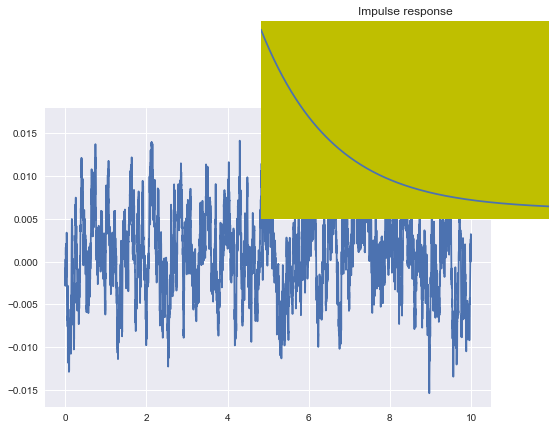

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# create some data to use for the plot
dt = 0.001
t = np.arange(0.0, 10.0, dt)
r = np.exp(-t[:1000]/0.05)               # impulse response
x = np.random.randn(len(t))
s = np.convolve(x, r)[:len(x)]*dt  # colored noise

# the main axes is subplot(111) by default
plt.plot(t, s)


# this is another inset axes over the main axes
a = plt.axes([0.5, 0.6, .5, .5], facecolor='y')
plt.plot(t[:len(r)], r)
plt.title('Impulse response')
plt.xlim(0, 0.2)
plt.xticks([])
plt.yticks([])

plt.show()


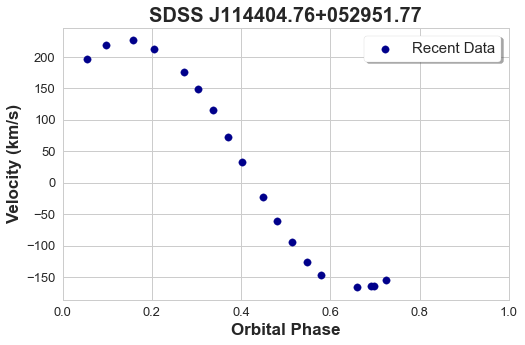

In [15]:
t_new = t1/(1/(frequency[np.argmax(power)]))
y_new = t_new %1

t_old = t2/(1/(frequency[np.argmax(power)]))
y_old = t_old %1

plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(8, 5), frameon = True, edgecolor = "black")
plt.title("SDSS J114404.76+052951.77", weight = "bold", size = 20)
plt.scatter(y_new,y1, color = "darkblue", s = 55, label = "Recent Data")
#plt.plot(y_old,y2, "gX", markersize = 15, label = "Old Data")
plt.xlabel("Orbital Phase", weight = "bold", size = 17)
plt.ylabel("Velocity (km/s)", weight = "bold", size = 17)
plt.legend(loc = "best", prop = {"size": 15}, frameon = True, shadow = True, fancybox = True)
plt.xlim(0,1)
plt.grid(True)
plt.tick_params("both", labelsize = 13)
# plt.savefig("/Users/linaflorez/Desktop/UT_TAURUS/Plots/PUBFoldedVel.pdf")
plt.show()

## For poster

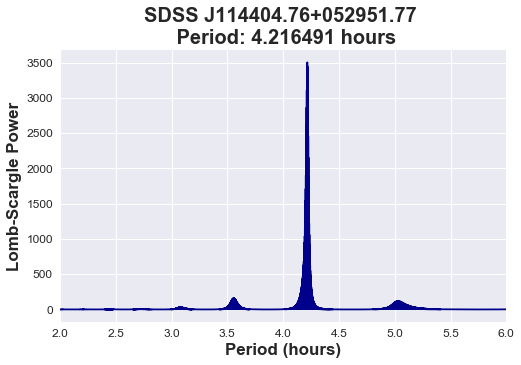

In [26]:
period = (1/frequency)
plt.style.use("seaborn")
plt.figure(figsize=(8, 5), frameon = True, edgecolor = "black")
plt.title("SDSS J114404.76+052951.77 \n Period: %f hours" % (period[np.argmax(power)]*24), weight = "bold", size = 20)
plt.plot(period *24, power, color = "darkblue", label = "Lomb Scargle")
plt.xlabel("Period (hours)", weight = "bold", size = 17)
plt.ylabel("Lomb-Scargle Power", weight = "bold", size = 17)
plt.xlim(2,6)
plt.tick_params("both", labelsize = 12)
plt.show()

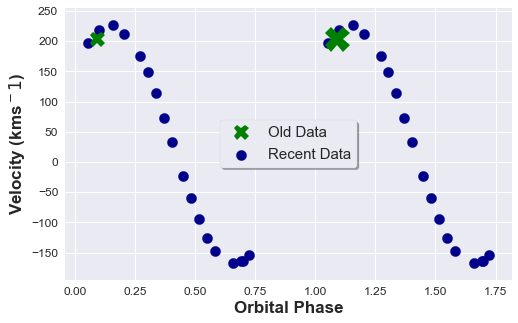

In [27]:
plt.style.use("seaborn")
plt.figure(figsize=(8, 5), frameon = True, edgecolor = "black")
plt.scatter(y_n1,y1, color = "darkblue", s = 105, label = "Recent Data")
plt.scatter(cp_yn1,y1, color = "darkblue", s = 105)
plt.plot(y_o3,y3, "gX", markersize = 15, label = "Old Data")
plt.plot(cp_yn3,y3, "gX", markersize = 25)
plt.xlabel("Orbital Phase", weight = "bold", size = 17)
plt.ylabel("Velocity (kms${^-1}$)", weight = "bold", size = 17)
plt.legend(loc = "best", prop = {"size": 15}, frameon = True, shadow = True, fancybox = True)
plt.tick_params("both", labelsize = 12)
# plt.savefig("/Users/linaflorez/Desktop/Summer2019/Plots/POSTERFoldedVel.pdf")
plt.show()

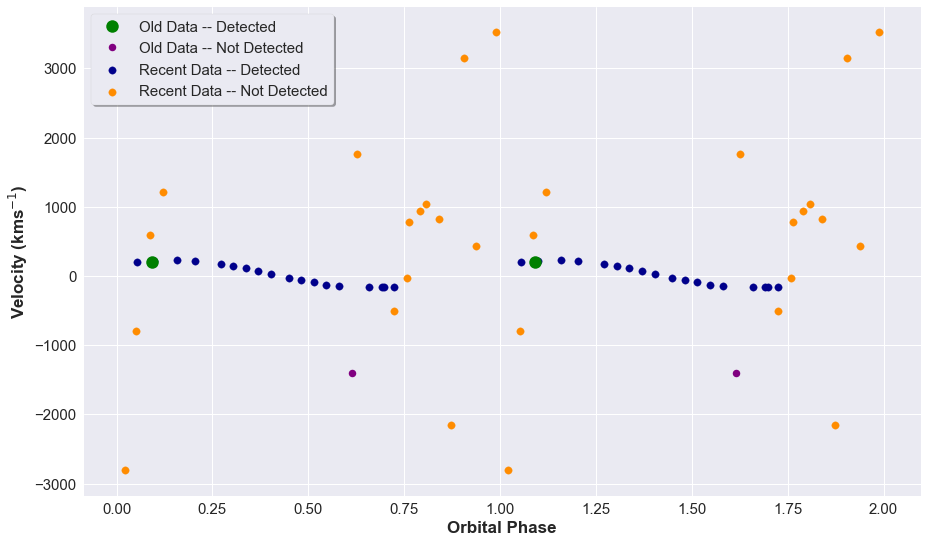

In [109]:
df1 = pd.read_csv("/Users/linaflorez/Desktop/UT_TAURUS/CSV_FILES/OriginalData.csv")
d1 = df1.loc[df1['Detections'] == 'Yes']
d2 = df1.loc[df1['Detections'] == 'No']

t1 = d1["MJD"].values
y1 = d1["Weighted Mean"].values
dy1 = d1["Weighted Error"].values

t2 = d2["MJD"].values
y2 = d2["Weighted Mean"].values
dy2 = d2["Weighted Error"].values

df2 = pd.read_csv("/Users/linaflorez/Desktop/UT_TAURUS/CSV_FILES/NEW_OLD.csv")
d3 = df2.loc[df2['Detections'] == 'Yes']
d4 = df2.loc[df2['Detections'] == 'No']

t3 = d3["MJD"].values
y3 = d3["Weighted Mean"].values
dy3 = d3["Weighted Error"].values

t4 = d4["MJD"].values
y4 = d4["Weighted Mean"].values
dy4 = d4["Weighted Error"].values

####################################################
#detected
t_n1 = t1/(1/(frequency[np.argmax(power)]))
y_n1 = t_n1 %1
cp_yn1 = [(x+1) for x in np.copy(y_n1)]

#not detected
t_n2 = t2/(1/(frequency[np.argmax(power)]))
y_n2 = t_n2 %1
cp_yn2 = [(x+1) for x in np.copy(y_n2)]

#detected
t_o3 = t3/(1/(frequency[np.argmax(power)]))
y_o3 = t_o3 %1
cp_yn3 = [(x+1) for x in np.copy(y_o3)]

#not detected
t_o4 = t4/(1/(frequency[np.argmax(power)]))
y_o4 = t_o4 %1
cp_yn4 = [(x+1) for x in np.copy(y_o4)]

####################################################

plt.figure(num=None, figsize=(15, 9),facecolor='w', edgecolor='k')
plt.scatter(y_n1,y1, color = "darkblue", s = 55, label = "Recent Data -- Detected")
plt.scatter(cp_yn1,y1, color = "darkblue", s = 55)

plt.scatter(y_n2,y2, color = "darkorange", s = 55, label = "Recent Data -- Not Detected")
plt.scatter(cp_yn2,y2, color = "darkorange", s = 55)

plt.plot(y_o3,y3, "g.", markersize = 25, label = "Old Data -- Detected")
plt.plot(cp_yn3,y3, "g.", markersize = 25)

plt.plot(y_o4,y4, ".", c = "purple", markersize = 15, label = "Old Data -- Not Detected")
plt.plot(cp_yn4,y4, ".", c = "purple", markersize = 15)

plt.xlabel("Orbital Phase", weight = "bold", size = 17)
plt.ylabel("Velocity (kms$^{-1}$)", weight = "bold", size = 17)
plt.legend(loc = "best", prop = {"size": 15}, frameon = True, shadow = True, fancybox = True)
#plt.xlim(0.01,1.99)
plt.grid(True)
plt.tick_params("both", labelsize = 15)
plt.show()

WDJ114404.76+052951.77_SCI_SLIT_FLUX_MERGE1D_VIS_24_TAC.csv


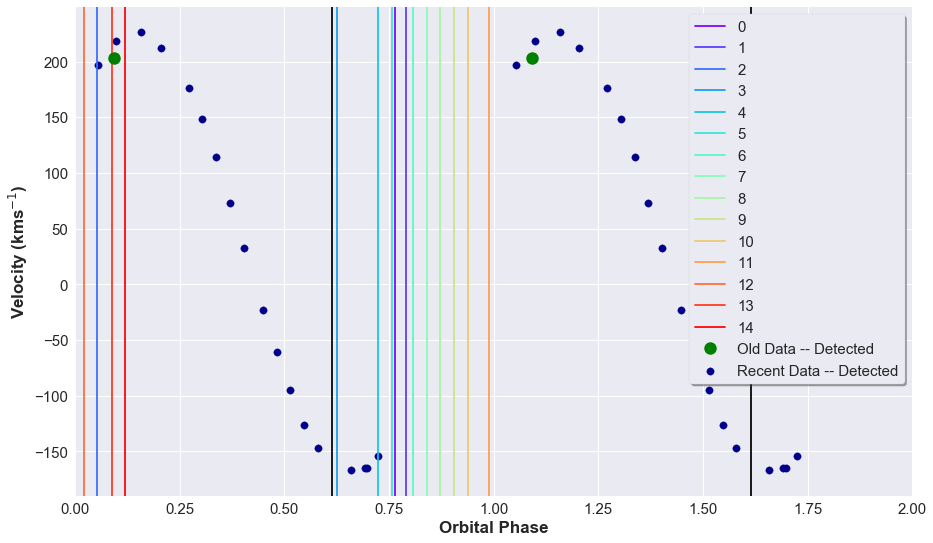

In [32]:
df1 = pd.read_csv("/Users/linaflorez/Desktop/UT_TAURUS/CSV_FILES/OriginalData.csv")
d1 = df1.loc[df1['Detections'] == 'Yes']
d2 = df1.loc[df1['Detections'] == 'No']

t1 = d1["MJD"].values
y1 = d1["Weighted Mean"].values
dy1 = d1["Weighted Error"].values

t2 = d2["MJD"].values
y2 = d2["Weighted Mean"].values
dy2 = d2["Weighted Error"].values

df2 = pd.read_csv("/Users/linaflorez/Desktop/UT_TAURUS/CSV_FILES/NEW_OLD.csv")
d3 = df2.loc[df2['Detections'] == 'Yes']
d4 = df2.loc[df2['Detections'] == 'No']

t3 = d3["MJD"].values
y3 = d3["Weighted Mean"].values
dy3 = d3["Weighted Error"].values

t4 = d4["MJD"].values
y4 = d4["Weighted Mean"].values
dy4 = d4["Weighted Error"].values

####################################################
#detected
t_n1 = t1/(1/(frequency[np.argmax(power)]))
y_n1 = t_n1 %1
cp_yn1 = [(x+1) for x in np.copy(y_n1)]

#not detected
t_n2 = t2/(1/(frequency[np.argmax(power)]))
y_n2 = t_n2 %1
cp_yn2 = [(x+1) for x in np.copy(y_n2)]

#detected
t_o3 = t3/(1/(frequency[np.argmax(power)]))
y_o3 = t_o3 %1
cp_yn3 = [(x+1) for x in np.copy(y_o3)]

#not detected
t_o4 = t4/(1/(frequency[np.argmax(power)]))
y_o4 = t_o4 %1
cp_yo4 = [(x+1) for x in np.copy(y_o4)]
####################################################

plt.figure(num=None, figsize=(15, 9),facecolor='w', edgecolor='k')
plt.scatter(y_n1,y1, color = "darkblue", s = 55, label = "Recent Data -- Detected")
plt.scatter(cp_yn1,y1, color = "darkblue", s = 55)

colors = cm.rainbow(np.linspace(0, 1, len(y_n2)))
for t in range(len(y_n2)):
    plt.axvline(y_n2[t], color = colors[t], label = "%i" % (t))

print(d2.iloc[7]["File Path"])

#[plt.axvline(t, color = "darkorange") for t in y_n2]
#[plt.axvline(t, color = "darkorange") for t in cp_yn2]

plt.plot(y_o3,y3, "g.", markersize = 25, label = "Old Data -- Detected")
plt.plot(cp_yn3,y3, "g.", markersize = 25)

[plt.axvline(t, color = "black") for t in y_o4]
[plt.axvline(t, color = "black") for t in cp_yo4]

plt.xlabel("Orbital Phase", weight = "bold", size = 17)
plt.ylabel("Velocity (kms$^{-1}$)", weight = "bold", size = 17)
plt.legend(loc = "best", prop = {"size": 15}, frameon = True, shadow = True, fancybox = True)
plt.xlim(0,2)
plt.grid(True)
plt.tick_params("both", labelsize = 15)
plt.show()



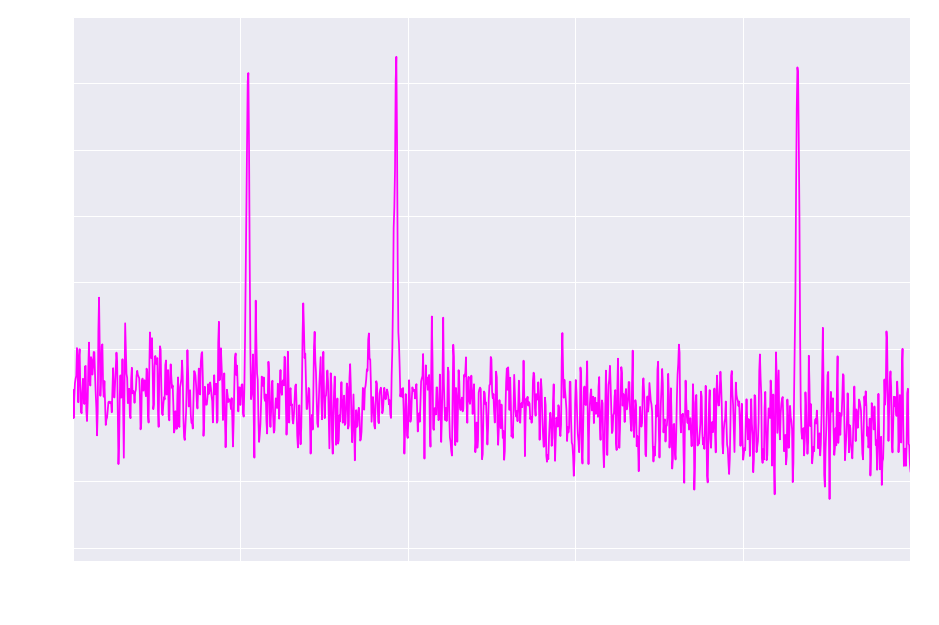

In [107]:
df = pd.read_csv("/Users/linaflorez/Desktop/UT_TAURUS/CSV_FILES/OriginalData.csv")
df = df.loc[df["Detections"] == "Yes"]
max_ = df["Weighted Mean"].idxmax()
file_name = df.iloc[max_]["File Path"]

path = "/Users/linaflorez/Desktop/UT_TAURUS/WDJ114404.76+052951.77/" #note the / on the end
#print(os.listdir(path))
vispath = path + 'VIS_notell/'
sp_csv = natsort.natsorted(glob.glob(vispath+'*TAC.csv')) #makes an array containing the path to all csv files. Note the TAC as I didn't want to include the merged spectrum


s = vispath + file_name
w, f, e = np.loadtxt(s, unpack=True, delimiter=',')


plt.figure(figsize=(15, 10), frameon = True , edgecolor = "white")
# plt.style.use("seaborn")
plt.plot(w,f, color = "magenta")
plt.xlim(8450, 8700)
plt.ylim(0.38e-16, 1.2e-16)
plt.grid(True, color = "white")
plt.xlabel("Wavelength (${\AA}$)", weight = "bold", color = "white", size = 20)
plt.ylabel("Flux (erg s$^{-1}$cm$^{-2}$${\AA}$$^{-1}$)", weight = "bold", color = "white", size = 20)
plt.tick_params("both", labelsize = 20, labelcolor = "white")
plt.savefig("/Users/linaflorez/Desktop/UT_TAURUS/PLOT.pdf", transparent=True)


